In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Data/Data_2013-2022.xlsx')

# 1. Overview of data

In [3]:
df.head()

,Race,Year,Stage nbr,length,Nbr 4 cat,Nbr 3 cat,Nbr 2 cat,Nbr 1 cat/HC,KM last climb - finish,Stage classification,elevation gain,Breakaway win
0,Giro,2013,1,130.0,2,0,0,0,90.4,0,1114,0
1,Giro,2013,3,222.0,0,1,1,0,19.8,1,3908,0
2,Giro,2013,4,244.0,0,1,1,0,4.7,1,3519,0
3,Giro,2013,5,203.0,2,0,0,0,20.3,0,1490,0
4,Giro,2013,6,169.0,0,0,0,0,169.0,0,550,0


In [4]:
df.describe()

,Year,Stage nbr,length,Nbr 4 cat,Nbr 3 cat,Nbr 2 cat,Nbr 1 cat/HC,KM last climb - finish,Stage classification,elevation gain,Breakaway win
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,2017.521352,11.014235,178.307117,0.489324,0.784698,0.503559,0.782918,43.086833,0.991103,2696.206406,0.377224
std,2.867310,5.787054,30.511220,0.838507,1.041859,0.774473,1.126188,58.282842,0.832662,1296.294123,0.485124
min,2013.000000,1.000000,59.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,0.000000
25%,2015.000000,6.000000,160.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1676.750000,0.000000
50%,2018.000000,11.000000,180.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,2692.500000,0.000000
75%,2020.000000,16.000000,197.375000,1.000000,1.000000,1.000000,1.000000,59.875000,2.000000,3702.250000,1.000000
max,2022.000000,21.000000,277.000000,6.000000,5.000000,5.000000,5.000000,222.000000,2.000000,6001.000000,1.000000


In [5]:
print(df.dtypes)

Race                       object
Year                        int64
Stage nbr                   int64
length                    float64
Nbr 4 cat                   int64
Nbr 3 cat                   int64
Nbr 2 cat                   int64
Nbr 1 cat/HC                int64
KM last climb - finish    float64
Stage classification        int64
elevation gain              int64
Breakaway win               int64
dtype: object


# 2. Analysis

First we will have a look to breakaway win per year for each Grand Tour

In [6]:
#A table to show the breakaway win per year in every Grand Tour
sum_GT = df.pivot_table(index="Year", columns="Race",values="Breakaway win", aggfunc="sum")
sum_GT

Race,Giro,Tour,Vuelta
Year,,,
2013,4,4,6
2014,6,5,4
2015,8,7,8
2016,6,8,9
2017,7,5,10
2018,4,4,8
2019,9,8,9
2020,9,4,6
2021,10,9,9


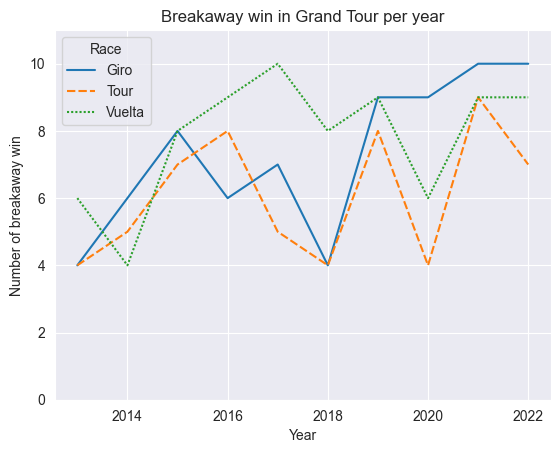

In [7]:
sns.set_style("darkgrid")

# plot distplot
fig, ax = plt.subplots()
sns.lineplot(data=sum_GT)
 
# This will change the limits of the x-axis
ax.set_ylim(0, 11)
 
# This will add label to the X-axis
ax.set_xlabel( "Year")
 
# This will add label to the Y-axis
ax.set_ylabel( "Number of breakaway win")
 
# This will add title to the plot
ax.set_title( "Breakaway win in Grand Tour per year") 
plt.show();

Now we can look at the breakaway win per stage classification (0=flat, 1=hilly, 2=mountain)

In [8]:
#A table to show the breakaway win per year in every Grand Tour
sum_stage = df.pivot_table(index="Year", columns="Stage classification",values="Breakaway win", aggfunc="sum")
sum_stage

Stage classification,0,1,2
Year,,,
2013,0,6,8
2014,2,4,9
2015,2,9,12
2016,0,10,13
2017,1,14,7
2018,1,8,7
2019,2,13,11
2020,1,8,10
2021,3,11,14


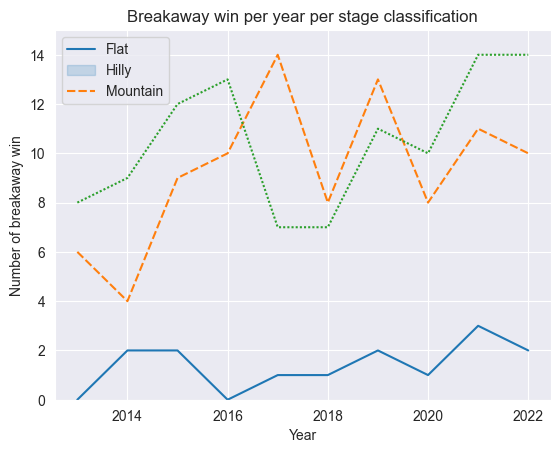

In [9]:
sns.set_style("darkgrid")

# plot distplot
fig, ax = plt.subplots()
sns.lineplot(data=sum_stage)
 
# This will change the limits of the x-axis
ax.set_ylim(0, 15)
 
# This will add label to the X-axis
ax.set_xlabel( "Year")
 
# This will add label to the Y-axis
ax.set_ylabel( "Number of breakaway win")
 
# This will add title to the plot
ax.set_title( "Breakaway win per year per stage classification") 
plt.legend(labels = ['Flat', "Hilly", 'Mountain'])
plt.show();

Now we will look at the rate of success of breakaway depending of the stage classification

In [10]:
rate_success_0 = 100*df.loc[df["Stage classification"]==0,]["Breakaway win"].sum()/len(df.loc[df["Stage classification"]==0,])
rate_success_0

7.106598984771574

In [11]:
rate_success_1 = 100*df.loc[df["Stage classification"]==1,]["Breakaway win"].sum()/len(df.loc[df["Stage classification"]==1,])
rate_success_1

53.75722543352601

In [12]:
rate_success_2 = 100*df.loc[df["Stage classification"]==2,]["Breakaway win"].sum()/len(df.loc[df["Stage classification"]==2,])
rate_success_2

54.6875

In [13]:
data = {'Stage Classification': ['Flat', 'Hilly', 'Mountain'], 'Win rate': [rate_success_0, rate_success_1, rate_success_2]}
df_rate = pd.DataFrame(data)

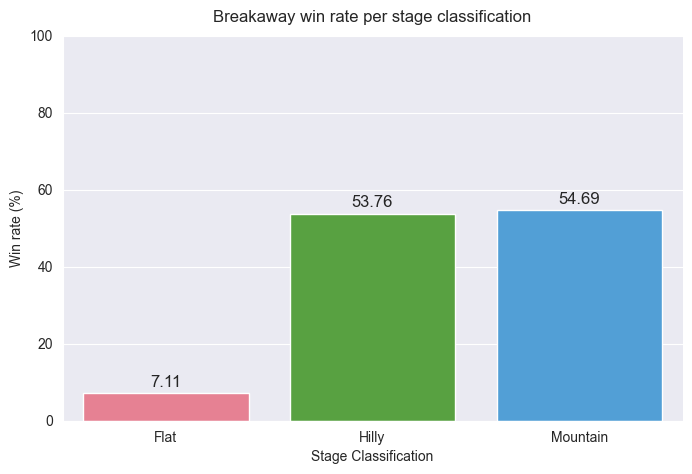

In [14]:
# Plot the success rate
plt.figure(figsize=(8, 5))
plots = sns.barplot(x="Stage Classification", y="Win rate", data=df_rate,palette="husl")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.ylim([0, 100])
plt.ylabel('Win rate (%)')
plt.title("Breakaway win rate per stage classification", pad = 10)


sns.despine()

plt.show()